In [17]:
import sklearn
from sklearn import datasets
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [18]:
irisDS = datasets.load_iris()

In [19]:
iris = pd.DataFrame(irisDS.data,columns=irisDS.feature_names)
iris["target"] = pd.Series(irisDS.target)
iris["label"] = iris["target"]
iris["target_label"] = iris["target"].apply(lambda x: irisDS.target_names[x])
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label,target_label
0,5.1,3.5,1.4,0.2,0,0,setosa
1,4.9,3.0,1.4,0.2,0,0,setosa
2,4.7,3.2,1.3,0.2,0,0,setosa
3,4.6,3.1,1.5,0.2,0,0,setosa
4,5.0,3.6,1.4,0.2,0,0,setosa
5,5.4,3.9,1.7,0.4,0,0,setosa
6,4.6,3.4,1.4,0.3,0,0,setosa
7,5.0,3.4,1.5,0.2,0,0,setosa
8,4.4,2.9,1.4,0.2,0,0,setosa
9,4.9,3.1,1.5,0.1,0,0,setosa


In [20]:
features = irisDS.data[:,:2]
labels = irisDS.target

In [21]:
from sklearn import tree

In [22]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features,labels)

In [23]:
print(clf.predict([[5.2,3.6]]))

[0]


In [24]:
data = iris

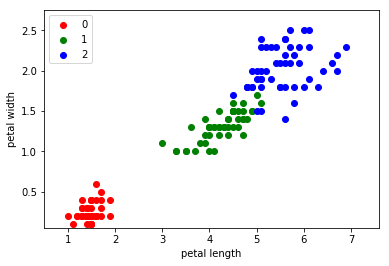

In [25]:
plt.ylim(data["petal width (cm)"].min()*.5,data["petal width (cm)"].max()*1.1)
plt.xlim(data["petal length (cm)"].min()*.5,data["petal length (cm)"].max()*1.1)
plt.xlabel("petal length")
plt.ylabel("petal width")
colors = ["r","g","b"]
for i in [0,1,2]:
    plt.scatter(data.loc[data["label"]==i]['petal length (cm)'].values, data.loc[data["label"]==i]['petal width (cm)'].values, c=["r","g","b"][i], label = data["label"].unique()[i])
plt.legend(loc="upper left")
plt.show()


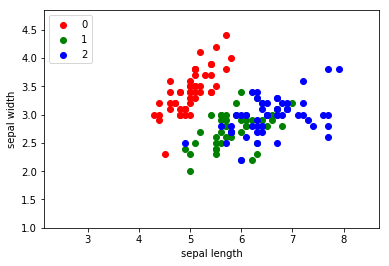

In [26]:
plt.ylim(data["sepal width (cm)"].min()*.5,data["sepal width (cm)"].max()*1.1)
plt.xlim(data["sepal length (cm)"].min()*.5,data["sepal length (cm)"].max()*1.1)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
colors = ["r","g","b"]
for i in [0,1,2]:
    plt.scatter(data.loc[data["label"]==i]['sepal length (cm)'].values, data.loc[data["label"]==i]['sepal width (cm)'].values, c=["r","g","b"][i], label = data["label"].unique()[i])
plt.legend(loc="upper left")
plt.show()


In [125]:
#Q.4. Write the command to split the data into 70% train and 30% test, to prepare for k-NN modelling:
from sklearn.model_selection import train_test_split

X = data.iloc[:, 2:4].values  
y = data.iloc[:, 4].values  

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30,random_state=12)

In [126]:
X_train.shape
X_test.shape

(45, 2)

In [127]:
#Q.5. Write the Python command that performs k-NN fit using Petal.Width and Petal.Length only using 2 neighbors.
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 2)
knnMdl = KNeighborsClassifier(n_neighbors=2)

# Fitting the model
knnMdl.fit(X_train,y_train)

# Predicting the Test set results
y_pred = knnMdl.predict(X_test)

In [128]:
print(y_pred)

[0 2 0 1 2 2 2 0 2 0 1 0 0 0 1 2 2 1 0 1 0 1 1 1 0 2 1 1 0 0 0 1 2 0 2 0 1
 1 0 1 1 0 0 0 0]


In [130]:
#Q.6. Evaluate your algorithm using the confusion_matrix and classification_report methods of the sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[20  0  0]
 [ 0 14  0]
 [ 0  1 10]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       0.93      1.00      0.97        14
          2       1.00      0.91      0.95        11

avg / total       0.98      0.98      0.98        45



In [131]:
#Q.7. What accuracy did you obtain?
print("Accuracy achieved on test data: "+np.str(accuracy_score(y_test, y_pred)))

Accuracy achieved on test data: 0.977777777778


In [143]:
#Q.8. Try with different values of k (3 and 5), do you observe any difference in your result? Explain.
#from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
knnMdl_3 = KNeighborsClassifier(n_neighbors=3)
knnMdl_5 = KNeighborsClassifier(n_neighbors=80)

# Fitting the model
knnMdl_3.fit(X_train,y_train)
knnMdl_5.fit(X_train,y_train)

# Predicting the Test set results
y_pred_3 = knnMdl_3.predict(X_test)
y_pred_5 = knnMdl_5.predict(X_test)

In [144]:
# print(y_pred_3)
print(y_pred_5)

[1 2 1 2 2 2 2 1 2 1 2 1 1 1 2 2 2 2 1 2 1 1 2 2 1 2 2 2 1 1 1 1 2 1 2 1 1
 1 1 1 1 1 1 1 1]


In [145]:
#Q.7. What accuracy did you obtain?
print(confusion_matrix(y_test, y_pred_3))
print(classification_report(y_test, y_pred_3))
print("Accuracy achieved on test data for k=3: "+np.str(accuracy_score(y_test, y_pred_3)))

print(confusion_matrix(y_test, y_pred_5))
print(classification_report(y_test, y_pred_5))

print("Accuracy achieved on test data for k=5: "+np.str(accuracy_score(y_test, y_pred_5)))

[[20  0  0]
 [ 0 13  1]
 [ 0  0 11]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        20
          1       1.00      0.93      0.96        14
          2       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45

Accuracy achieved on test data for k=3: 0.977777777778
[[ 0 20  0]
 [ 0  6  8]
 [ 0  0 11]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        20
          1       0.23      0.43      0.30        14
          2       0.58      1.00      0.73        11

avg / total       0.21      0.38      0.27        45

Accuracy achieved on test data for k=5: 0.377777777778


C:\Users\Joe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#Q.9. List three methods that can be used to improve prediction q
13/16